In [172]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.svm import SVC,SVR
from sklearn.datasets import make_classification,make_regression
import joblib
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Import for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# Import for regression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [173]:
def eda(df, target, type='a'):  # Exploratory Data Analysis


    # Display unique label count
    unique_count = df[target].nunique()
    print("Label Count =", unique_count)

    # Type 'a': Standard preprocessing
    if type == 'a':
        for col in df.select_dtypes(include=['object']).columns:
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
        # Handle missing values
        print(df.isnull().sum())
        df.fillna(df.mean(), inplace=True)  
        x = df.drop(columns=[target])
        y = df[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        # Apply StandardScaler and MinMaxScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        print(df.shape)
        return x_train, x_test, y_train, y_test

    # Type 'b': TF-IDF for text data
    if type == 'b':
        df.dropna(inplace=True)
        x = df[target].astype(str)  # Use only the text column for vectorization
        y = df[target]

        # Ensure labels are categorical
        if not y.dtype == 'object':
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)

        x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        vectorizer = TfidfVectorizer()
        x_train = vectorizer.fit_transform(x_train_raw)
        x_test = vectorizer.transform(x_test_raw)

        return x_train, x_test, y_train, y_test


In [174]:
base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'
Launch_Path= 'Models/'
os.makedirs(Launch_Path, exist_ok=True)


In [175]:
def DTC_Func(x_train, x_test, y_train, y_test, parameters, CV, Ver, name):
    
    classifier = DecisionTreeClassifier()
    grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, n_jobs=-1, cv=CV, verbose=Ver)
    grid_search.fit(x_train, y_train)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(x_test)
    ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
    print(classification_report(y_test, y_pred))
    best_model = grid_search.best_estimator_
    plt.figure(figsize=(10, 6))

    tree.plot_tree(best_model,filled=True)


In [176]:
X,y = make_classification(n_samples=10000, n_features=20,
                          n_redundant=0, n_informative=18,
                           n_classes=2, random_state=42)


In [177]:
pca = PCA(n_components=15)  # Specify the number of principal components
principalComponents = pca.fit_transform(X)


In [178]:
principalDf = pd.DataFrame(data=principalComponents,
                           )


In [179]:
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['price'])], axis=1)


In [180]:
finalDf.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,price
0,-7.952670,-1.230006,0.607064,3.175262,-1.423673,3.944628,-2.391271,-1.405963,0.788038,-1.803307,-1.642009,1.321311,-0.411713,1.667526,-1.538882,1
1,6.968648,0.273235,-2.095169,2.096923,3.710453,1.973032,-1.949210,5.782871,0.451099,-2.451700,0.878829,2.043603,1.732047,0.624798,1.341238,0
2,-1.448166,-2.353046,-0.080978,2.856358,-2.975924,2.593763,0.496827,2.557284,0.045655,1.291858,5.381404,-4.381556,-0.398659,-0.014501,-3.995942,1
3,-5.136557,0.301351,6.666702,-1.466876,6.626639,0.499179,4.734831,-4.960524,-0.228159,-0.633715,3.066893,-0.459154,-0.099140,-2.992802,0.326432,1
4,0.138029,-4.473939,-6.008831,-3.056427,-1.181729,0.587706,-3.550063,-4.084121,1.928128,-2.111984,1.477925,-1.422674,0.530895,-1.574371,-0.470246,0


In [181]:
x_train, x_test, y_train, y_test = eda(finalDf,'price')


Label Count = 2
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
price    0
dtype: int64
(10000, 16)


In [182]:
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}


{'criterion': 'entropy', 'max_depth': 40, 'min_samples_split': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       994
           1       0.83      0.83      0.83      1006

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



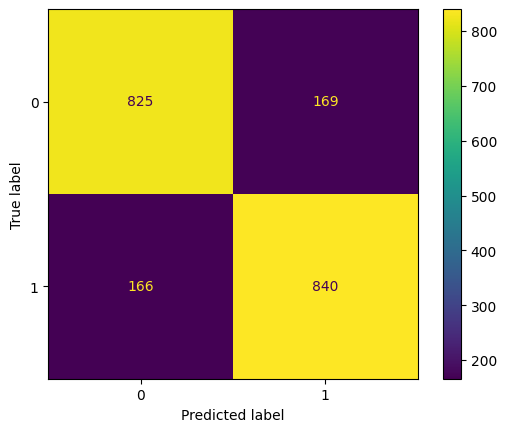

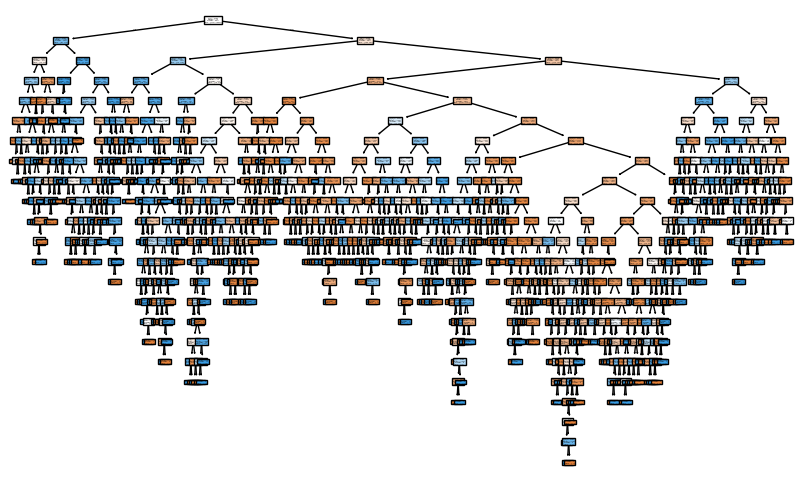

In [183]:
DTC_Func(x_train, x_test, y_train, y_test,parameters,6,0,'AirBnb') #SVR Function
